# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

### Solution

1: n_estimators sets the size of the bootstrap sample to be drawn from the training data. The choice of n is related to the bias-variance tradeoff: Higher n means lower variance (chance of overfitting) but also higher bias, while lower n tend to reduce the bias at the expense of a higher variance.

2: max_depth specifiies the maximum number of splits in each tree. Many splits typically lead to overfitting, whereas to few can result in a sizable bias

3: max_features is the maximum number of features to consider when looking for a split. Agian the choice here is related to a bias-variance tradeoff, with a higher number of features involving a risk of overfitting.

4: bootstrap indicates whether the trees should be build using bootstrapped samples. If your dataset is highly imbalanced in terms of classification (e.g. only 5% =1 and 95%=-1), then bootstrapping might give you samples with only one outcome, which can lead to bad performance. In that case you might be better off by setting bootstrap=False and instead introduce variation by varying the number of features with the max_feature option.


> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

### Solution

max_features=# of features \
bootstrap=False

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

### Solution

In [4]:
class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']


In [5]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap

#Rename tools
sc = StandardScaler()
pca = PCA(n_components=2)
lda = LDA(n_components=2)
reducer = umap.UMAP()

#Set up colormap
y_hat = DBSCAN(eps=22).fit_predict(X_digits)
cmap = cmap_in_categories(sorted(set(y_hat)))

y_hat_wine = DBSCAN(eps=22).fit_predict(X_wine)
cmap2 = cmap_in_categories(sorted(set(y_hat)))

## Digits data

### 3.1.2  - 1

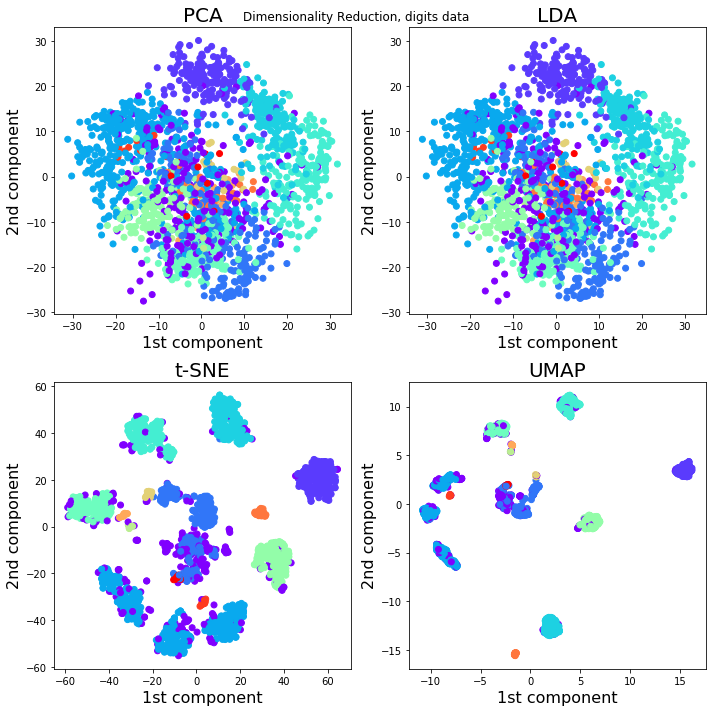

In [6]:
#Plot 
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.suptitle('Dimensionality Reduction, digits data')

# PCA
X_digits_pca = pca.fit_transform(X_digits)

ax1.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=[cmap(y_) for y_ in y_hat])
ax1.set_title("PCA", fontsize=20)
ax1.set_xlabel("1st component", fontsize=16)
ax1.set_ylabel("2nd component", fontsize=16)

#LDA
X_digits_lda = pca.fit_transform(X_digits)

ax2.scatter(X_digits_lda[:, 0], X_digits_lda[:, 1], c=[cmap(y_) for y_ in y_hat])
ax2.set_title("LDA", fontsize=20)
ax2.set_xlabel("1st component", fontsize=16)
ax2.set_ylabel("2nd component", fontsize=16)


#T-sne
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_digits)
ax3.set_title("t-SNE", fontsize=20)
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=[cmap(y_) for y_ in y_hat])
ax3.set_xlabel("1st component", fontsize=16)
ax3.set_ylabel("2nd component", fontsize=16)

#UMAP
reducer = umap.UMAP(random_state=42)

X_umap = reducer.fit_transform(X_digits)
X_umap.shape

ax4.set_title("UMAP", fontsize=20)
ax4.scatter(X_umap[:, 0], X_umap[:, 1], c=[cmap(y_) for y_ in y_hat])
ax4.set_xlabel("1st component", fontsize=16)
ax4.set_ylabel("2nd component", fontsize=16)

fig.tight_layout()

plt.show()


## Wine data

### 3.1.2  - 2

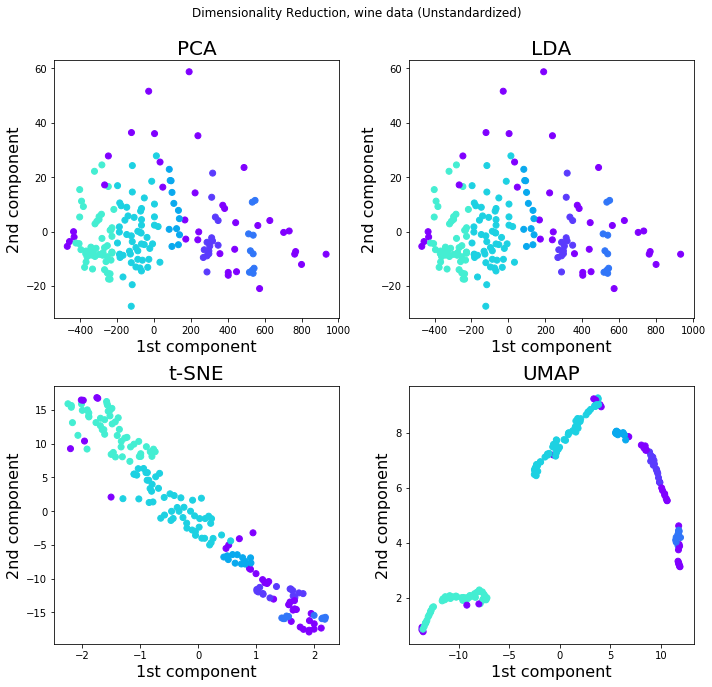

In [116]:
#Plot - not standardized
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.suptitle('Dimensionality Reduction, wine data (Unstandardized)')

# PCA
X_wine_pca = pca.fit_transform(X_wine)

ax1.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax1.set_title("PCA", fontsize=20)
ax1.set_xlabel("1st component", fontsize=16)
ax1.set_ylabel("2nd component", fontsize=16)

#LDA
X_wine_lda = pca.fit_transform(X_wine)

ax2.scatter(X_wine_lda[:, 0], X_wine_lda[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax2.set_title("LDA", fontsize=20)
ax2.set_xlabel("1st component", fontsize=16)
ax2.set_ylabel("2nd component", fontsize=16)

#T-sne
tsne = TSNE(n_components=2)
X_wine_tsne = tsne.fit_transform(X_wine)
ax3.set_title("t-SNE", fontsize=20)
ax3.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax3.set_xlabel("1st component", fontsize=16)
ax3.set_ylabel("2nd component", fontsize=16)

#UMAP
reducer = umap.UMAP(random_state=42)

X_wine_umap = reducer.fit_transform(X_wine)
X_wine_umap.shape

ax4.set_title("UMAP", fontsize=20)
ax4.scatter(X_wine_umap[:, 0], X_wine_umap[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax4.set_xlabel("1st component", fontsize=16)
ax4.set_ylabel("2nd component", fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

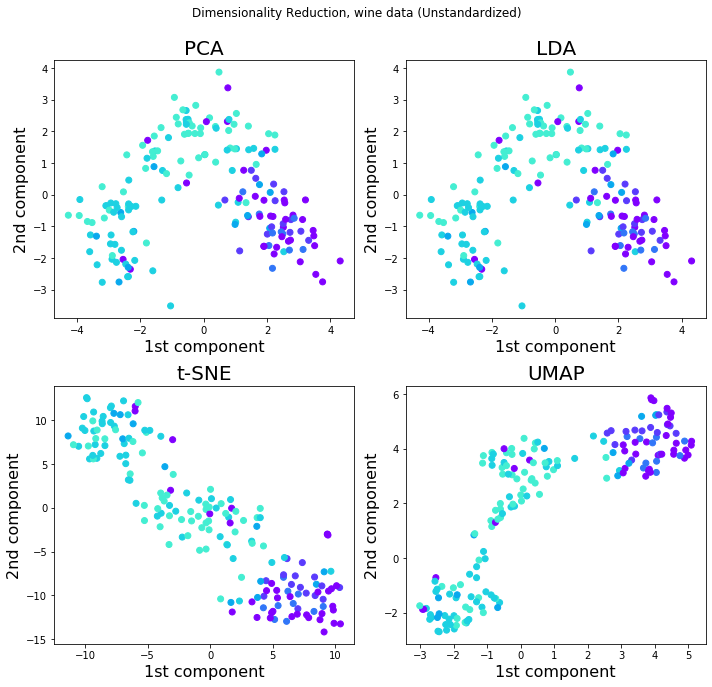

In [120]:
# Standardize
X_wine_std = sc.fit_transform(X_wine)

#Plot
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.suptitle('Dimensionality Reduction, wine data (Unstandardized)')


# PCA
X_wine_std_pca = pca.fit_transform(X_wine_std)

ax1.scatter(X_wine_std_pca[:, 0], X_wine_std_pca[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax1.set_title("PCA", fontsize=20)
ax1.set_xlabel("1st component", fontsize=16)
ax1.set_ylabel("2nd component", fontsize=16)

#LDA
X_wine_std_lda = pca.fit_transform(X_wine_std)

ax2.scatter(X_wine_std_lda[:, 0], X_wine_std_lda[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax2.set_title("LDA", fontsize=20)
ax2.set_xlabel("1st component", fontsize=16)
ax2.set_ylabel("2nd component", fontsize=16)

#T-sne
tsne = TSNE(n_components=2)
X_wine_std_tsne = tsne.fit_transform(X_wine_std)
ax3.set_title("t-SNE", fontsize=20)
ax3.scatter(X_wine_std_tsne[:, 0], X_wine_std_tsne[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax3.set_xlabel("1st component", fontsize=16)
ax3.set_ylabel("2nd component", fontsize=16)

#UMAP
reducer = umap.UMAP(random_state=42)
X_wine_std_umap = reducer.fit_transform(X_wine_std)

ax4.set_title("UMAP", fontsize=20)
ax4.scatter(X_wine_std_umap[:, 0], X_wine_std_umap[:, 1], c=[cmap2(y_) for y_ in y_hat_wine])
ax4.set_xlabel("1st component", fontsize=16)
ax4.set_ylabel("2nd component", fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There are notable differences between the standardized and unstardized subplots for the wine data, beacuse the features in the wine data all have different dimensions and thus will be weighed on different scales. To avoid this improper weighing we have to standardize the features (X

### 3.1.2 - 3
With the digits data the UMAP and t-SNE clearly outperforms the more simple methods of PCA and LDA.

With the less complex wine data, the differences between the upper and lower panel, i.e. the simple PCA and LDA and the two non-linear methods is less clear cut and neither method seems to outperform the others.

Hence, based on this, admittedly very poor, sample size a cautious conlclusion could be that the non-linear methods may be better suited for dimensionality reduction of data with high dimensionality, but does not seem to have any advantage over the linear methods when considering low-dimension data.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

Athey and Imbens considers a model to be honest if it uses different information for selection of model structure and model estimation. 

The advantage of honest models as opposed to the common alternative of adaptive methods is that they offer valid confidence intervals for the treatment effects within each subgroup. 

In their model, they obtain honesty by splitting their training sample in two and using one part for constructing their tree and the other for estimating the treatment effects within the leaves of the tree. Without this separation, there is a risk of spurious correlations between covariates and outcomes that leads to biases and poor coverage properties of confidence intervals, as is the case for adaptive models.

This advantage of Athey and Imben's honest model to produce valid CI's outweighs, they argue, its drawback of smaller sample sizes due to the additional partioning of the training data.